# Project Title: Unemployment Analysis with Python
--- 
## Objective:



### Import Library
---

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")


In [36]:
print(df1.head())
print(df1.shape)

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
(768, 7)


In [37]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [38]:
df = pd.concat([df1,df2], ignore_index = True)
df.shape

(1035, 10)

In [39]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    1007 non-null   object        
 1    Date                                     1007 non-null   datetime64[ns]
 2    Frequency                                1007 non-null   object        
 3    Estimated Unemployment Rate (%)          1007 non-null   float64       
 4    Estimated Employed                       1007 non-null   float64       
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 56.7+ KB


In [41]:
df.drop(columns = ['Region.1','longitude','latitude'] , axis = 1 , inplace = True)
df.shape

(1035, 7)

In [48]:
df[" Date"] = pd.to_datetime(df[' Date'])

/tmp/ipykernel_14597/1547680487.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[" Date"] = pd.to_datetime(df[' Date'])


In [42]:
df.isnull().sum()

Region                                       28
 Date                                        28
 Frequency                                   28
 Estimated Unemployment Rate (%)             28
 Estimated Employed                          28
 Estimated Labour Participation Rate (%)     28
Area                                        295
dtype: int64

### Eda


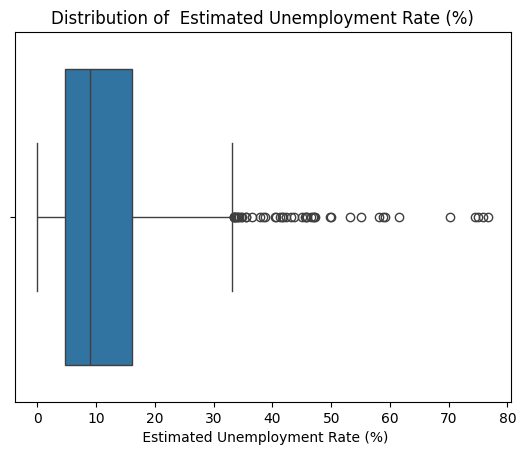

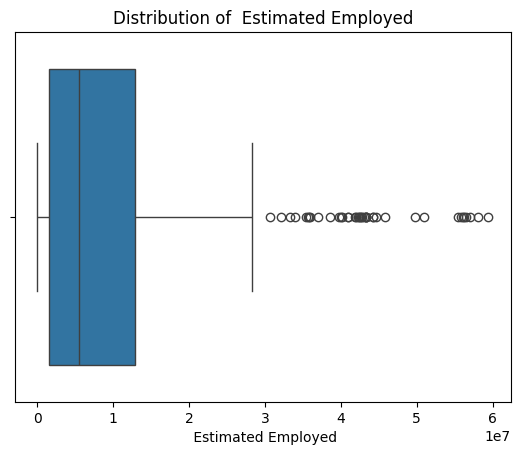

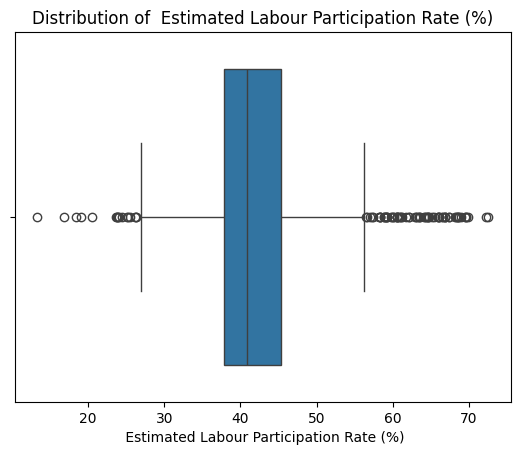

<Figure size 640x480 with 0 Axes>

In [46]:
num_col = [' Estimated Unemployment Rate (%)' , ' Estimated Employed' , ' Estimated Labour Participation Rate (%)' ]

for col in num_col:
    plt.figure()
    sns.boxplot(data = df , x = col)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.tight_layout()


/tmp/ipykernel_14597/1511497701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df ,x = col , palette = 'Set1')


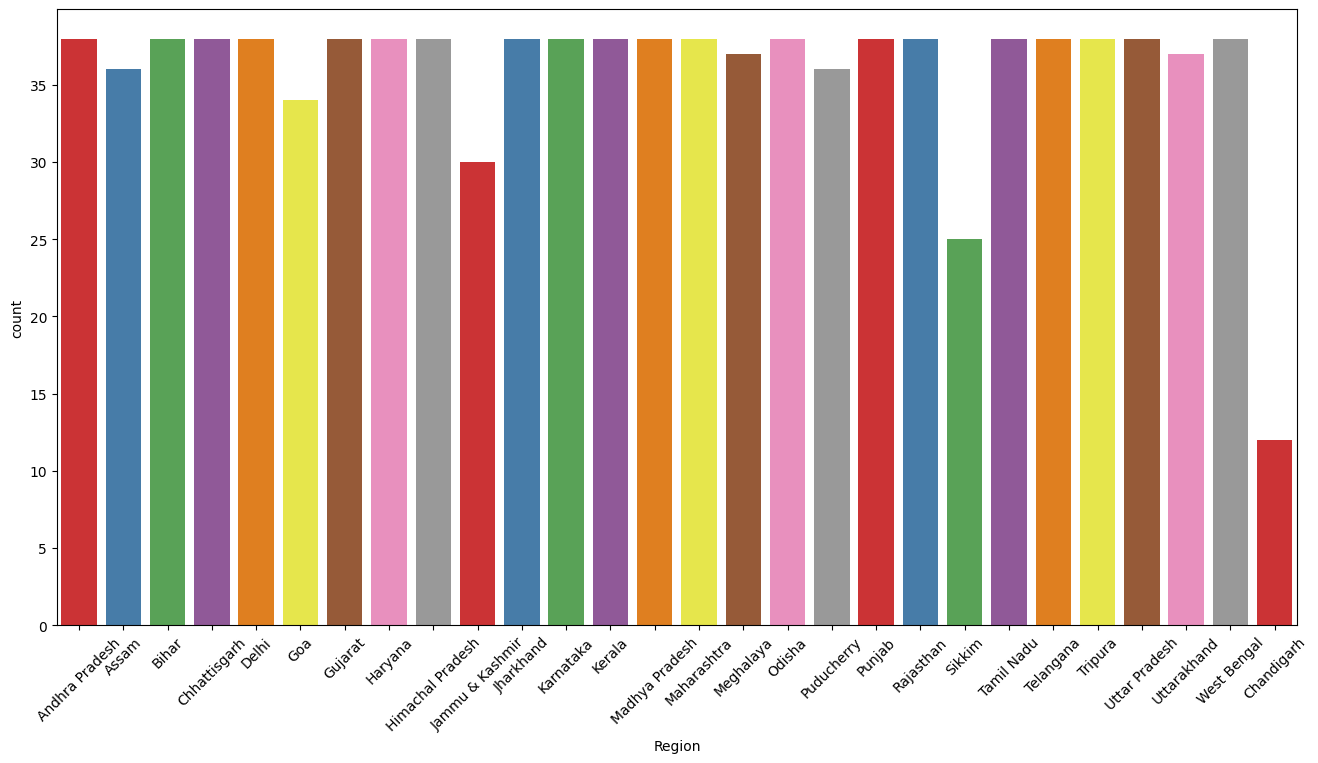

/tmp/ipykernel_14597/1511497701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df ,x = col , palette = 'Set1')


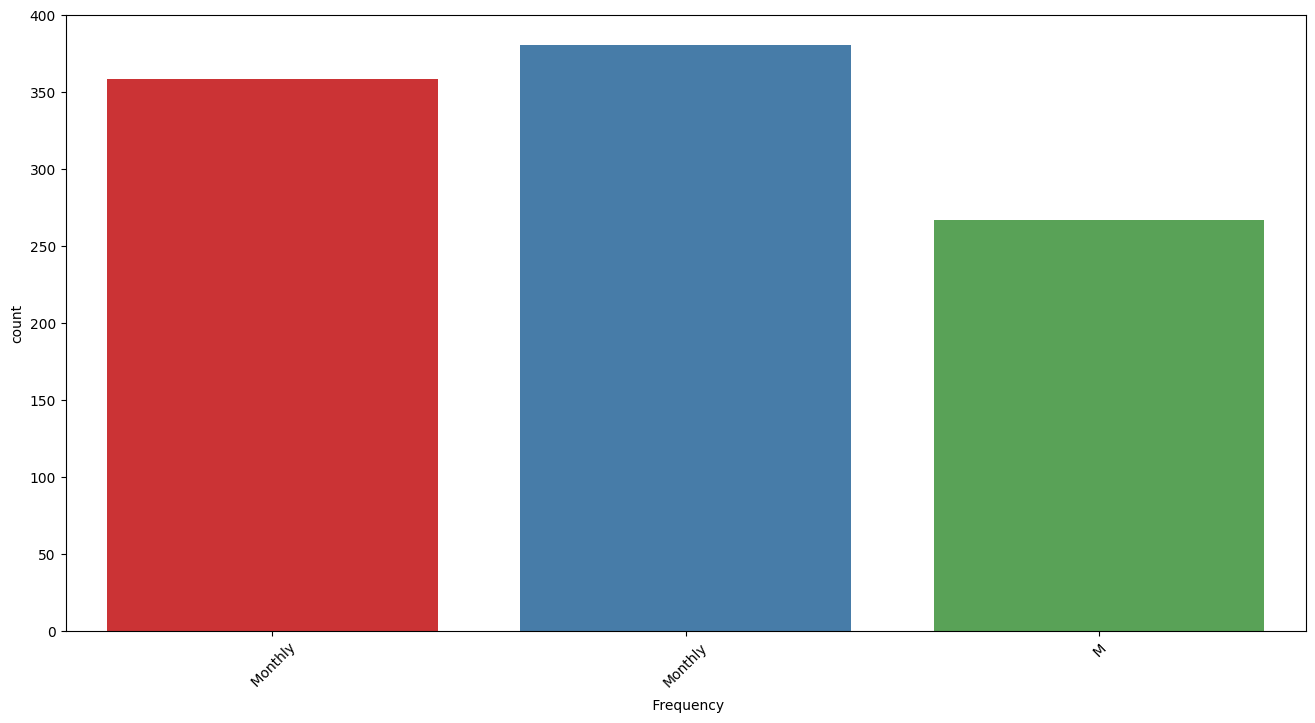

/tmp/ipykernel_14597/1511497701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df ,x = col , palette = 'Set1')


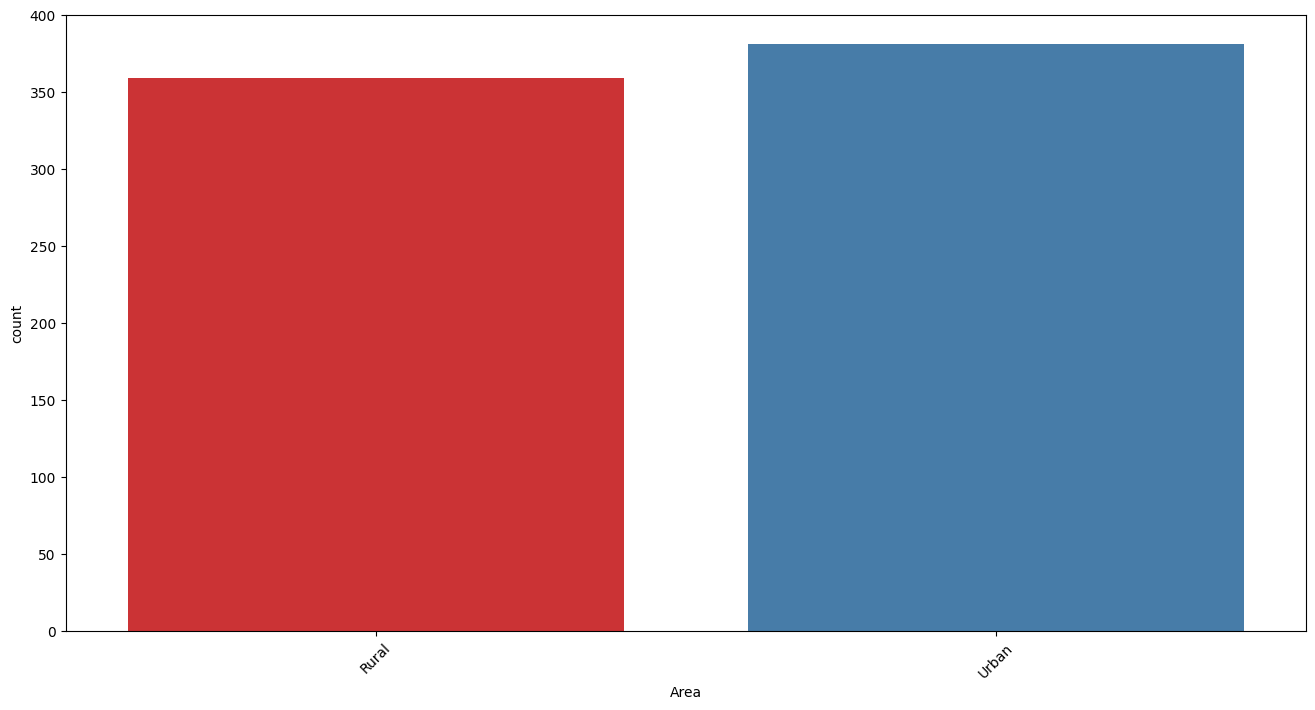

In [57]:
cat_col = ['Region', ' Frequency' , 'Area']

for col in cat_col:
    plt.figure(figsize=[16,8])
    sns.countplot(data = df ,x = col , palette = 'Set1')
    plt.xticks(rotation = 45)
    plt.show()

### Bivariate analysis
---

In [60]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

/tmp/ipykernel_14597/3298241794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ' Estimated Unemployment Rate (%)' , y = 'Region' , data = df , palette = 'Set1')


<Axes: xlabel=' Estimated Unemployment Rate (%)', ylabel='Region'>

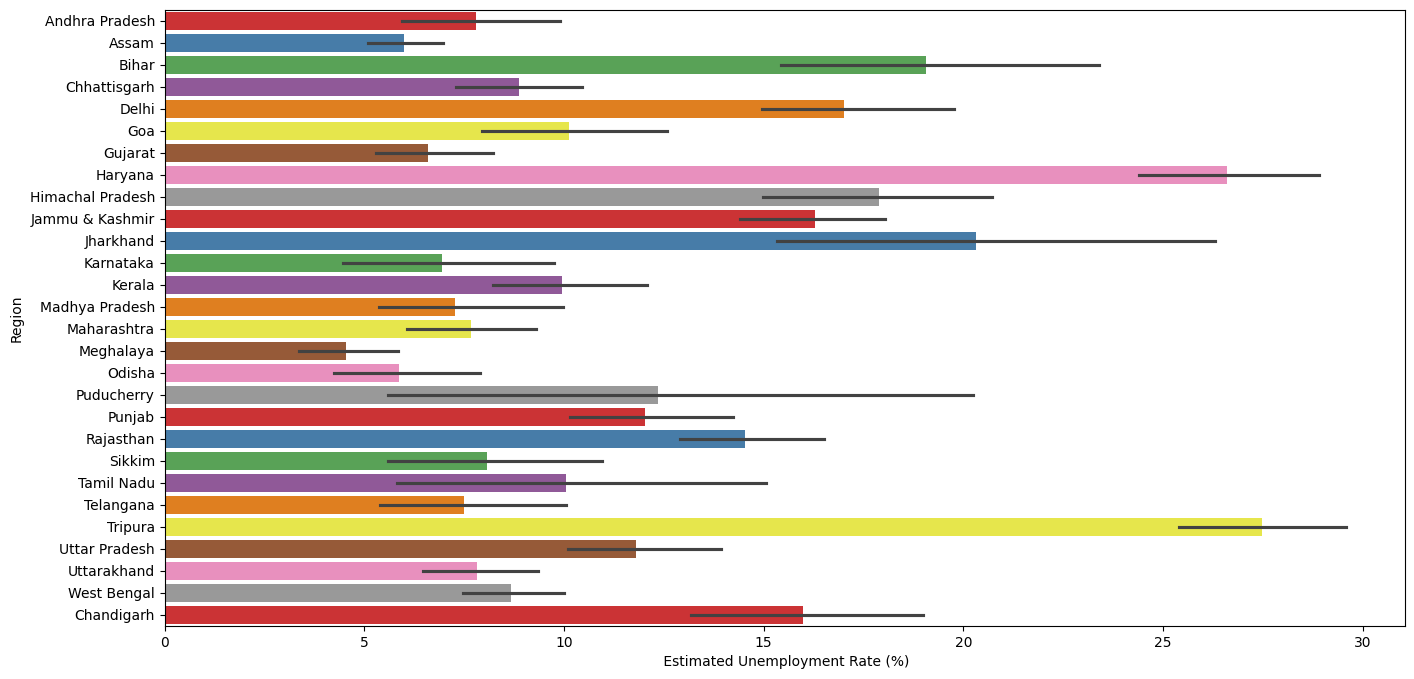

In [64]:
#estimated unemployment rate vs region 
plt.figure(figsize = [16,8])
sns.barplot(x = ' Estimated Unemployment Rate (%)' , y = 'Region' , data = df , palette = 'Set1')


<Axes: xlabel=' Date', ylabel=' Estimated Unemployment Rate (%)'>

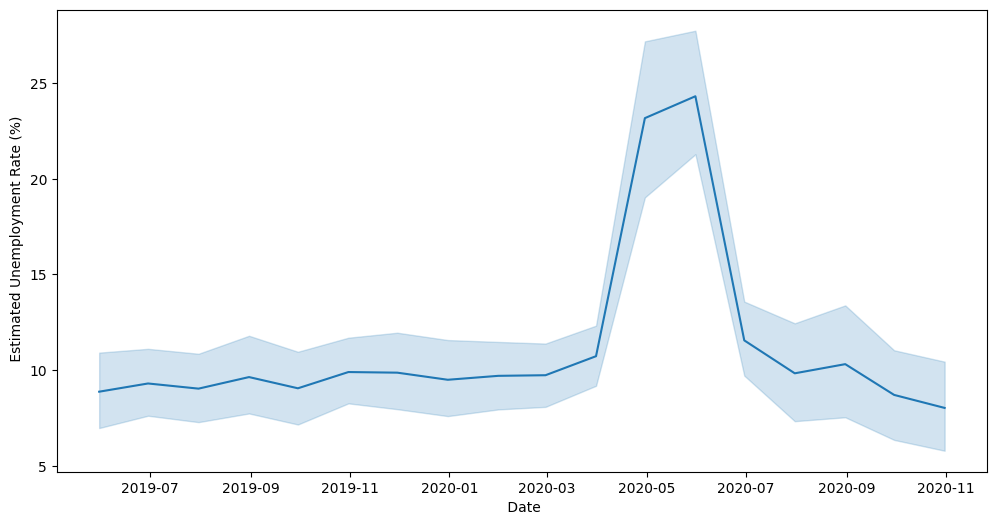

In [72]:
plt.figure(figsize= [12,6])
sns.lineplot(x = ' Date' , y =' Estimated Unemployment Rate (%)' , data = df)


### Preprocessing
---

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    1007 non-null   object        
 1    Date                                     1007 non-null   datetime64[ns]
 2    Frequency                                1007 non-null   object        
 3    Estimated Unemployment Rate (%)          1007 non-null   float64       
 4    Estimated Employed                       1007 non-null   float64       
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 56.7+ KB


In [86]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [76]:
df['Region'].value_counts()

Region
Andhra Pradesh      38
Kerala              38
West Bengal         38
Uttar Pradesh       38
Tripura             38
Telangana           38
Tamil Nadu          38
Rajasthan           38
Punjab              38
Odisha              38
Madhya Pradesh      38
Maharashtra         38
Karnataka           38
Jharkhand           38
Himachal Pradesh    38
Haryana             38
Gujarat             38
Delhi               38
Chhattisgarh        38
Bihar               38
Meghalaya           37
Uttarakhand         37
Assam               36
Puducherry          36
Goa                 34
Jammu & Kashmir     30
Sikkim              25
Chandigarh          12
Name: count, dtype: int64

In [85]:
#filling the missing value
#region 28 NaN values and its approximately distributed equally across the states 
#filling the values in region while maintaining the distribution
columns = ['Region' , 'Area']
for col in columns:
    probability = df[col].value_counts(normalize = True)
    choices = probability.index.tolist()
    weights = probability.values

    mask = df[col].isna()
    df.loc[mask , col] = np.random.choice(choices , size = mask.sum(), p = weights)

#filling missing values of date column

df[' Date'] = df[' Date'].fillna(method = 'ffill') # f fill --> forward fill  , it will fill the nan with the it next value
df[' Date'] = df[' Date'].fillna(method = 'bfill') # b fill --> backward fill , it will fill the nan with it previous row value


# filling the missing value of frequency 

df[' Frequency'] = 'Monthly'

# using median fill for the  Estimated Unemployment Rate (%) 
df[' Estimated Unemployment Rate (%)'].fillna(df[' Estimated Unemployment Rate (%)'].median() , inplace = True)
#similarly for the   Estimated Employed and  Estimated Labour Participation Rate (%)

df[' Estimated Employed'].fillna(df[' Estimated Employed'].median() , inplace = True)
df[' Estimated Labour Participation Rate (%)'].fillna(df[' Estimated Labour Participation Rate (%)'].median() , inplace = True)




/tmp/ipykernel_14597/4273820206.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[' Date'] = df[' Date'].fillna(method = 'ffill') # f fill --> forward fill  , it will fill the nan with the it next value
/tmp/ipykernel_14597/4273820206.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[' Date'] = df[' Date'].fillna(method = 'bfill') # b fill --> backward fill , it will fill the nan with it previous row value
/tmp/ipykernel_14597/4273820206.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [87]:
df.to_csv('cleaned_data.csv',index = False)